Importações

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Funções

In [16]:
def simulate_infection(graph: nx.Graph, beta: float, mi: float, initial_nodes: int, max_iter: int, simulation: int) -> np.array:
    nodes = graph.number_of_nodes()
    history = np.zeros((simulation, max_iter))
    
    for i in range(simulation):
        # Gerar conjunto de infectados
        infected = set(np.random.choice(a=nodes, size=initial_nodes, replace=False))
        
        for j in range(max_iter):
            new_recovered = set()
            new_infected = set()

            # Marcar novos infectados
            for node in infected:
                for susceptible in graph.neighbors(node):
                    if not susceptible in infected and np.random.rand() < beta:
                        new_infected.add(susceptible)
    
            # Marcar novos recuperados
            for node in infected:
                if np.random.rand() < mi:
                    new_recovered.add(node)
            
            # Atualizar lista de infectados
            infected -= new_recovered
            infected |= new_infected
            
            # Atualizar history
            infected_count = len(infected)
            history[i, j] = infected_count
            
            # Epidemia extinta
            if infected_count == 0:  
                break
            
    return np.mean(history, axis=0) / nodes

Constantes

In [17]:
N = 10000
k = 20
max_iter = 100
simulation = 100
initial_nodes = 5
beta1 = 0.02
beta2 = 0.01

Gerar grafos

In [18]:
G1 = nx.erdos_renyi_graph(n=N, p=k/(N-1), seed=42)
G2 = nx.barabasi_albert_graph(n=N, m=k//2, seed=42) #ainda precisa criar funcao propria para gamma=2.5

Simular infecção

In [19]:
infected_fraction1 = [(simulate_infection(G1, beta1, mi, initial_nodes, max_iter, simulation), mi) for mi in [0.1, 0.4, 0.5]]

In [20]:
infected_fraction2 = [(simulate_infection(G2, beta2, mi, initial_nodes, max_iter, simulation), mi) for mi in [0.1, 0.2, 0.3]]

Plotar gráficos

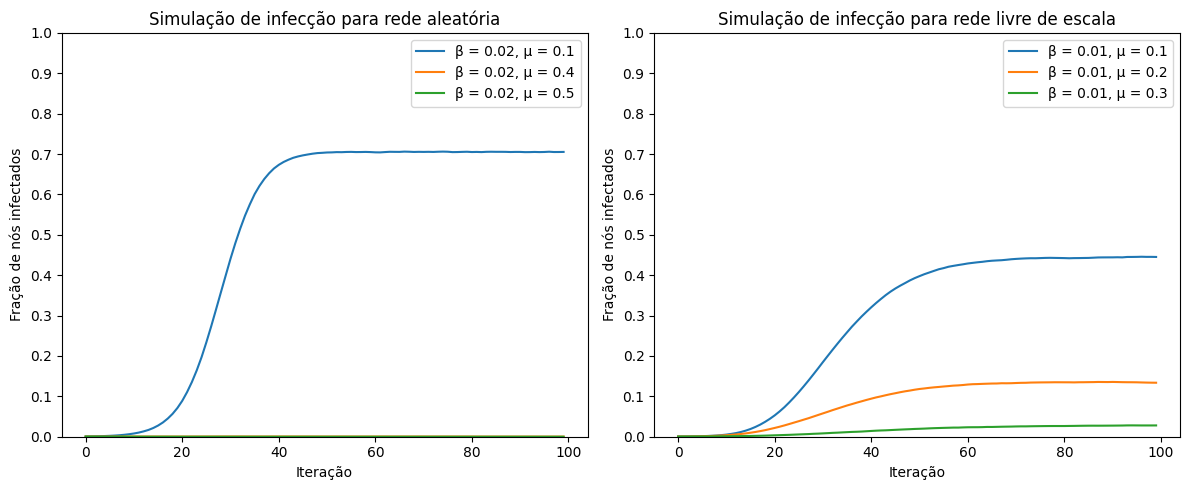

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for inf_frac, mi in infected_fraction1:
    plt.plot(inf_frac, label=f'β = {beta1}, μ = {mi}')
plt.title('Simulação de infecção para rede aleatória')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.subplot(1, 2, 2)
for inf_frac, mi in infected_fraction2:
    plt.plot(inf_frac, label=f'β = {beta2}, μ = {mi}')
plt.title('Simulação de infecção para rede livre de escala')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.tight_layout()
plt.show()